In [20]:
## Importing required libraries

import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

In [29]:
data_path = os.path.join(os.path.dirname(os.getcwd()),'data','IMDB_Movie_Review_Data.csv')

In [30]:
## Getting the dataset

data = pd.read_csv(data_path)

In [31]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [32]:
data.shape

(50000, 2)

In [33]:
## Looking for missng values

data.isna().sum()

review       0
sentiment    0
dtype: int64

* There are no missing values

In [34]:
## Looking for duplicated data

data[data.duplicated()]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


* There are some duplicated data we will remove those.

In [35]:
## Removing duplicated data

data.drop_duplicates(keep='first',inplace=True)

In [36]:
## Reseting indexes

data.reset_index(drop=True,inplace=True)

In [37]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49577,I thought this movie did a down right good job...,positive
49578,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49579,I am a Catholic taught in parochial elementary...,negative
49580,I'm going to have to disagree with the previou...,negative


In [38]:
data['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

* The dataset is nicely balanced

In [39]:
## Encoding sentiment column

data['sentiment'] = [0 if sentiment=='negative' else 1 for sentiment in data['sentiment']]

In [40]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [41]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [42]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amanv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amanv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
## cleaning review data

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)         # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)   # Remove special characters and digits
    text = text.lower()                       # Convert to lowercase
    return text

data['review'] = data['review'].apply(clean_text)

In [44]:
data['review'][0]

'one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty picture

In [45]:
## removing stopwords

data['review'] = data['review'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

data['review'] = data['review'].apply(remove_stopwords)

data['review'] = [' '.join(review) for review in data['review']]

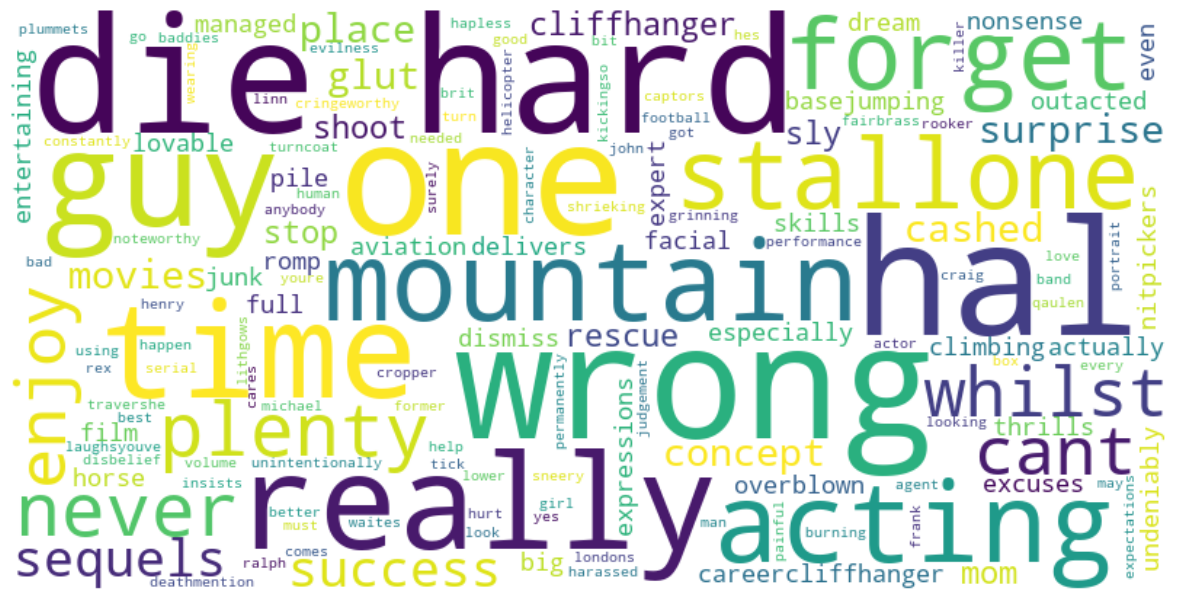

In [46]:
## making word cloud

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(data['review'][20])
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [48]:
## Embedding

In [49]:
data['review_length'] = [len(review.split()) for review in data['review']]

In [50]:
data['review_length'].max()

1420

In [51]:
data.drop(columns=['review_length'],inplace=True)

* The maximum review length is 1420 so we will take our vocabulary size to be 5000

In [52]:
review_list = data['review'].values

In [53]:
review_list[5]

'probably alltime favorite movie story selflessness sacrifice dedication noble cause preachy boring never gets old despite seen times last years paul lukas performance brings tears eyes bette davis one truly sympathetic roles delight kids grandma says like dressedup midgets children makes fun watch mothers slow awakening whats happening world roof believable startling dozen thumbs theyd movie'

In [54]:
voc_size = 5000
one_hot_representation = [one_hot(words,voc_size) for words in review_list]    ## Creating one hot representation
one_hot_representation[0]

[790,
 218,
 2661,
 990,
 2610,
 2310,
 128,
 1090,
 1323,
 2775,
 3279,
 3955,
 1018,
 383,
 4753,
 2610,
 4301,
 3934,
 843,
 4126,
 20,
 1323,
 4637,
 4938,
 3114,
 1698,
 43,
 1581,
 3332,
 1698,
 1197,
 3199,
 2712,
 2856,
 2282,
 4126,
 3091,
 1828,
 3992,
 3593,
 986,
 2610,
 322,
 4566,
 1283,
 2465,
 3666,
 3402,
 1154,
 77,
 3656,
 162,
 2694,
 2613,
 2390,
 3012,
 2810,
 863,
 1792,
 735,
 1090,
 822,
 2313,
 4197,
 3883,
 2694,
 1626,
 2155,
 2257,
 2110,
 2137,
 4370,
 2682,
 2098,
 996,
 1316,
 2976,
 3,
 2793,
 4114,
 4668,
 2940,
 4848,
 1026,
 4706,
 2627,
 4582,
 4471,
 445,
 1698,
 4536,
 297,
 3112,
 100,
 4330,
 2042,
 4292,
 2813,
 2601,
 3304,
 3754,
 970,
 4292,
 3694,
 4292,
 416,
 3945,
 1117,
 2885,
 1018,
 2310,
 832,
 2157,
 4753,
 3392,
 2590,
 1653,
 4582,
 384,
 2649,
 4988,
 3545,
 2610,
 4718,
 679,
 2313,
 3777,
 3198,
 4126,
 4126,
 3490,
 1019,
 2901,
 3841,
 3483,
 2508,
 3008,
 3841,
 4780,
 3696,
 144,
 4624,
 3423,
 424,
 1678,
 2172,
 3008,
 24

In [55]:
## Padding

max_len = 500
one_hot_representation  =  sequence.pad_sequences(one_hot_representation,maxlen=max_len)
one_hot_representation[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [56]:
one_hot_representation

array([[   0,    0,    0, ..., 2482, 3861, 1008],
       [   0,    0,    0, ..., 4686, 3423, 3458],
       [   0,    0,    0, ..., 4938, 1957, 1929],
       ...,
       [   0,    0,    0, ..., 1413, 3535, 3884],
       [   0,    0,    0, ...,   84, 3051, 1346],
       [   0,    0,    0, ..., 1271, 2757, 4916]])

In [57]:
data['review'] = list(one_hot_representation)

In [58]:
data

,review,sentiment
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
...,...,...
49577,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
49578,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
49579,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
49580,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


In [59]:
X = np.array(data['review'].tolist())
y = np.array(data['sentiment'].tolist())

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [61]:
X_train

array([[   0,    0,    0, ..., 1244, 2581, 2885],
       [   0,    0,    0, ...,   60, 1323,  657],
       [   0,    0,    0, ..., 4848, 1050, 3970],
       ...,
       [   0,    0,    0, ..., 4414,  173, 2666],
       [   0,    0,    0, ..., 4046, 3584, 3423],
       [   0,    0,    0, ..., 1624, 4494,   20]])

In [62]:
print(f"Train input data dimension: {X_train.shape}")
print(f"Test input data dimension: {X_test.shape}")
print(f"Train target data dimension: {y_train.shape}")
print(f"Test target data dimension: {y_test.shape}")

Train input data dimension: (34707, 500)
Test input data dimension: (14875, 500)
Train target data dimension: (34707,)
Test target data dimension: (14875,)


In [63]:
model = Sequential()
model.add(Embedding(voc_size,128,input_length=max_len))
model.add(SimpleRNN(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [64]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [66]:
## Instance for Early stopping call back

earlystopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
earlystopping

In [67]:
history = model.fit(
          X,y,
          epochs=10,
          batch_size=32,
          validation_split=0.20,
          callbacks = [earlystopping]
)

Epoch 1/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 309s 241ms/step - accuracy: 0.6630 - loss: 0.6147 - val_accuracy: 0.8052 - val_loss: 0.4309
Epoch 2/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 267s 215ms/step - accuracy: 0.8282 - loss: 0.3883 - val_accuracy: 0.8241 - val_loss: 0.4040
Epoch 3/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 234s 189ms/step - accuracy: 0.8617 - loss: 0.3279 - val_accuracy: 0.8400 - val_loss: 0.3792
Epoch 4/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 223s 179ms/step - accuracy: 0.8838 - loss: 0.2811 - val_accuracy: 0.7657 - val_loss: 0.4915
Epoch 5/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 247s 199ms/step - accuracy: 0.8612 - loss: 1.2926 - val_accuracy: 0.8171 - val_loss: 0.4058
Epoch 6/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 198s 160ms/step - accuracy: 0.8847 - loss: 0.2830 - val_accuracy: 0.8113 - val_loss: 0.4264
Epoch 7/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 170s 137ms/step - accuracy: 0.9190 - loss: 0.2041 - val_accuracy: 0.8359 - val_loss: 0.4619
Epoch 8/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 175s 141ms/step - ac

In [73]:
## Saving model file

model_path = os.path.join(os.path.dirname(os.getcwd()),'models','movie_review_sentiment_analyzer_simple_rnn.h5')
model.save(model_path)

In [74]:
## Prediction pipeline

In [75]:
model =  load_model(model_path)

In [70]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)         # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)   # Remove special characters and digits
    text = text.lower()                       # Convert to lowercase
    return text

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

def create_word_cloud(cleaned_tokens):
    input_text = ' '.join(cleaned_tokens)
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(input_text)
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

def vector_tranformation(cleaned_tokens):
    input_text = ' '.join(cleaned_tokens)
    voc_size = 5000
    one_hot_representation = [one_hot(words,voc_size) for words in input_text]

    max_len = 500
    one_hot_representation  =  sequence.pad_sequences(one_hot_representation,maxlen=max_len)
    X = np.array(list(one_hot_representation))
    return X

def preprocessing(text):
    cleaned_text = clean_text(text)
    tokenized_words = word_tokenize(cleaned_text)
    cleaned_tokens = remove_stopwords(tokenized_words)
    create_word_cloud(cleaned_tokens)
    X = vector_tranformation(cleaned_tokens)
    return X

In [71]:
text = "I loved this movie! The acting was superb and the plot was engaging."

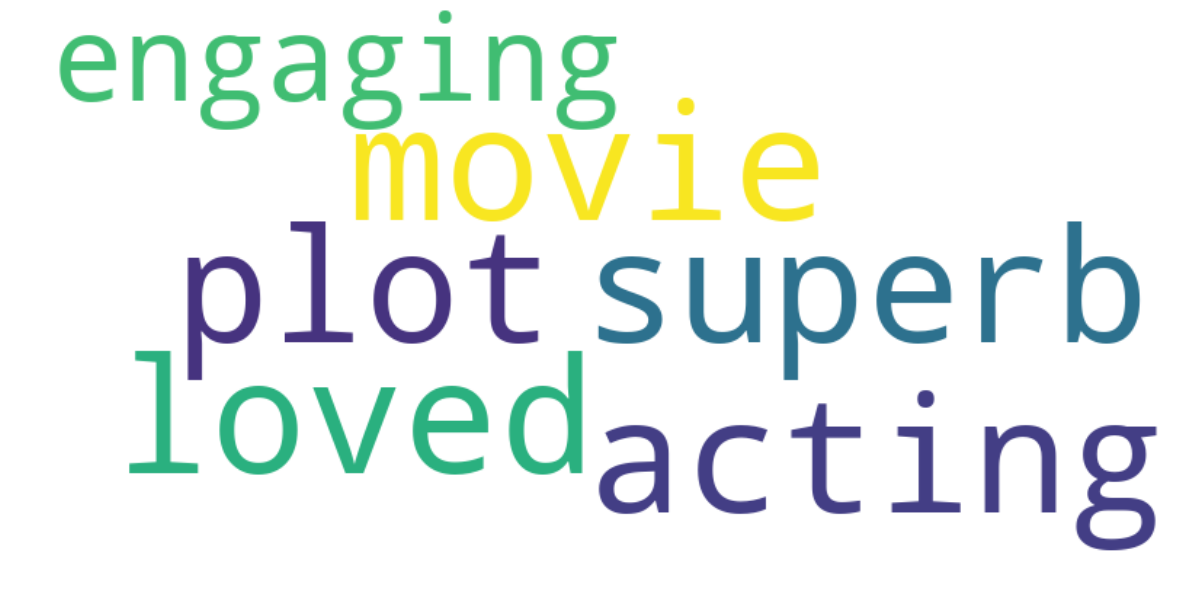

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step
It seems to be Positive review and i am 51.25% sure about my prediction


In [72]:
X = preprocessing(text)
prediction = model.predict(X)
sentiment  = 'Positive' if prediction[0][0] > 0.5 else 'Negative'
print(f"It seems to be {sentiment} review and i am {prediction[0][0]*100:.2f}% sure about my prediction")

In [70]:
## Streamlit Application

In [71]:
import streamlit as st

In [ ]:
st.title('IMDG movie review sentimental analysis')
st.write('Write a movie review')

user_input = st.text_area('Movie Review')

if st.button('Get result'):
   X = preprocessing(text)
   prediction = model.predict(X)
   sentiment  = 'Positive' if prediction[0][0] > 0.5 else 'Negative'
else:
   st.write("Please enter movie review")
